In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import mysql.connector

print("Librairies chargées avec succès !")

Librairies chargées avec succès !


In [4]:
# Configuration de la connexion
db_config = {
    'host': 'localhost',
    'user': 'root',           # On change 'user' par 'root'
    'password': 'rootpassword', # Le mot de passe root défini dans docker-compose
    'database': 'chinook',
    'port': 3307
}

# Création de la connexion
conn = mysql.connector.connect(**db_config)
print("Connecté à la base de données Chinook !")

Connecté à la base de données Chinook !


In [5]:
query = """
    SELECT Artist.Name, COUNT(Album.AlbumId) as AlbumCount
    FROM Artist
    LEFT JOIN Album ON Artist.ArtistId = Album.ArtistId
    GROUP BY Artist.Name
    ORDER BY AlbumCount DESC
    LIMIT 10;
"""

# On charge le résultat directement dans un DataFrame Pandas
df = pd.read_sql(query, conn)

# Affichage du tableau
display(df)

C:\Users\dinay\AppData\Local\Temp\ipykernel_23000\3672673730.py:11: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql(query, conn)


,Name,AlbumCount
0,Accept,2
1,AC/DC,1
2,Aerosmith,0


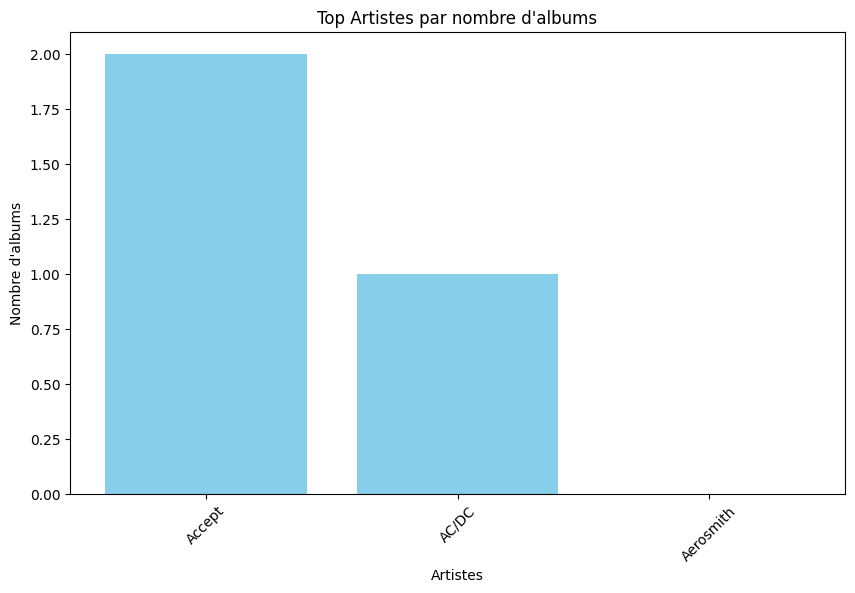

In [6]:
# Création d'un graphique en barres
plt.figure(figsize=(10, 6))
plt.bar(df['Name'], df['AlbumCount'], color='skyblue')
plt.xlabel('Artistes')
plt.ylabel("Nombre d'albums")
plt.title('Top Artistes par nombre d\'albums')
plt.xticks(rotation=45)
plt.show()